In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json
from scipy.stats import ttest_1samp

# Processing data

In [2]:
rca = pd.read_csv('../../data/results/rca_ensemb.csv').query('check == "pass"')
rca

,embed,norm,train_n,fold,r2,check
0,CBOW_GoogleNews,Freq_HAL,8668,1,0.660651,pass
1,CBOW_GoogleNews,Freq_HAL,8668,2,0.659874,pass
2,CBOW_GoogleNews,Freq_HAL,8668,3,0.678498,pass
3,CBOW_GoogleNews,Freq_HAL,8668,4,0.657754,pass
4,CBOW_GoogleNews,Freq_HAL,8668,5,0.687100,pass
...,...,...,...,...,...,...
7295,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,1,0.512233,pass
7296,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,2,0.586266,pass
7297,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,3,0.555577,pass
7298,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,4,0.437230,pass


In [3]:
# Changing category names to custom cat names
meta = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col=0)
meta

,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,
Freq_HAL,Log10 version of frequency norms based on the ...,"Lund, K. and C. Burgess (1996). ""Producing hig...",frequency,NaN,numeric,79671
Freq_KF,Log10 version of frequency norms based on the ...,"Kučera, H. and W. N. Francis (1967). Computati...",frequency,NaN,numeric,35230
Freq_SUBTLEXUS,Log10 version of frequency norms based on the ...,"Brysbaert, M. and B. New (2009). ""Moving beyon...",frequency,NaN,numeric,57214
Freq_SUBTLEXUK,Log10 version of the frequency norms based on ...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",frequency,NaN,numeric,61843
Freq_Blog,Log10 version of the frequency norms based on ...,"Gimenes, M. and B. New (2016). ""Worldlex: Twit...",frequency,NaN,numeric,70646
...,...,...,...,...,...,...
familiarity_vanarsdall,Ratings from 1 (highly unfamiliar) to 7 (highl...,"@article{vanarsdall2022analyzing,\n title={An...",familiarity,NaN,numeric,1200
imageability_vanarsdall,Ratings from 1 (low imagery) to 7 (high imagery),"@article{vanarsdall2022analyzing,\n title={An...",imageability,NaN,numeric,1200
familiarity_fear,Ratings from 1 (extremely infrequent) to 7 (ex...,"@article{fear1997ratings,\n title={Ratings fo...",familiarity,NaN,numeric,703


In [4]:
# Adding norm_category to rca
rca['norm_category'] = (
    rca['norm'].apply(lambda norm: meta.loc[norm]['category'])
    .replace({'_': ' '}, regex=True)
)
rca

,embed,norm,train_n,fold,r2,check,norm_category
0,CBOW_GoogleNews,Freq_HAL,8668,1,0.660651,pass,frequency
1,CBOW_GoogleNews,Freq_HAL,8668,2,0.659874,pass,frequency
2,CBOW_GoogleNews,Freq_HAL,8668,3,0.678498,pass,frequency
3,CBOW_GoogleNews,Freq_HAL,8668,4,0.657754,pass,frequency
4,CBOW_GoogleNews,Freq_HAL,8668,5,0.687100,pass,frequency
...,...,...,...,...,...,...,...
7295,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,1,0.512233,pass,imageability
7296,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,2,0.586266,pass,imageability
7297,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,3,0.555577,pass,imageability
7298,morphoNLM&PPMI_SVD_SWOW,imageability_fear,500,4,0.437230,pass,imageability


In [5]:
rca_mean = (
    rca[['embed', 'norm', 'r2']].groupby(['embed', 'norm'], as_index=False).mean()
    .rename(columns={'r2': 'r2_mean'})
)
rca_mean

,embed,norm,r2_mean
0,CBOW_GoogleNews,Angry_Binder,0.529488
1,CBOW_GoogleNews,AoA_Glasgow,0.604935
2,CBOW_GoogleNews,AoA_Kuper,0.580193
3,CBOW_GoogleNews,AoA_LWV,0.610645
4,CBOW_GoogleNews,Arousal_Binder,0.553350
...,...,...,...
1450,morphoNLM&PPMI_SVD_SWOW,valence_janschewitz,0.700097
1451,morphoNLM&PPMI_SVD_SWOW,valence_zupan,0.790989
1452,morphoNLM&PPMI_SVD_SWOW,visual_complexity_marrow,0.524038
1453,morphoNLM&PPMI_SVD_SWOW,visual_lyn,0.489210


In [6]:
rca_mean['norm_category'] = (
    rca_mean['norm'].apply(lambda norm: meta.loc[norm]['category'])
    .replace({'_': ' '}, regex=True)
)
rca_mean

,embed,norm,r2_mean,norm_category
0,CBOW_GoogleNews,Angry_Binder,0.529488,emotion
1,CBOW_GoogleNews,AoA_Glasgow,0.604935,age of acquisition
2,CBOW_GoogleNews,AoA_Kuper,0.580193,age of acquisition
3,CBOW_GoogleNews,AoA_LWV,0.610645,age of acquisition
4,CBOW_GoogleNews,Arousal_Binder,0.553350,arousal
...,...,...,...,...
1450,morphoNLM&PPMI_SVD_SWOW,valence_janschewitz,0.700097,valence
1451,morphoNLM&PPMI_SVD_SWOW,valence_zupan,0.790989,valence
1452,morphoNLM&PPMI_SVD_SWOW,visual_complexity_marrow,0.524038,sensory
1453,morphoNLM&PPMI_SVD_SWOW,visual_lyn,0.489210,sensory


In [7]:
rca_grand_mean = (
    rca_mean[['embed', 'norm_category', 'r2_mean']]
    .groupby(['embed', 'norm_category'], as_index=False).mean(numeric_only=True)
    .rename(columns={'r2_mean': 'r2_grand_mean'})
)
rca_grand_mean

,embed,norm_category,r2_grand_mean
0,CBOW_GoogleNews,age of acquisition,0.413873
1,CBOW_GoogleNews,animacy,0.720898
2,CBOW_GoogleNews,arousal,0.528839
3,CBOW_GoogleNews,associatability,0.146539
4,CBOW_GoogleNews,autidtory lexical decision,0.076410
...,...,...,...
130,morphoNLM&PPMI_SVD_SWOW,social/moral,0.674280
131,morphoNLM&PPMI_SVD_SWOW,space/time/quantity,0.485689
132,morphoNLM&PPMI_SVD_SWOW,this/that,0.516101
133,morphoNLM&PPMI_SVD_SWOW,valence,0.718647


In [8]:
with open('../../data/embed_to_dtype.json', 'r') as f:
    embed_to_type = json.load(f)
    
def embed_to_group(embed_name):
    if '&' in embed_name:
        name_1, name_2 = embed_name.split('&')
        return embed_to_type[name_1] + '&' + embed_to_type[name_2]
    else:
        return embed_to_type[embed_name]
    
rca_grand_mean['embed'] = rca_grand_mean['embed'].apply(embed_to_group)
rca_grand_mean = rca_grand_mean.groupby(['embed', 'norm_category'], as_index=False).mean(numeric_only=True)
rca_grand_mean['norm_category'] = rca_grand_mean['norm_category'].str.title()
rca_grand_mean

,embed,norm_category,r2_grand_mean
0,text,Age Of Acquisition,0.361621
1,text,Animacy,0.615593
2,text,Arousal,0.401580
3,text,Associatability,0.176012
4,text,Autidtory Lexical Decision,0.073087
...,...,...,...
76,text&text,Social/Moral,0.632243
77,text&text,Space/Time/Quantity,0.499539
78,text&text,This/That,0.525242
79,text&text,Valence,0.636918


In [9]:
# Sorts norm_category by grand mean of top_embed 
categories = (
    rca_grand_mean.query(f'embed == "text&behavior"')
    .sort_values('r2_grand_mean', ascending=True)['norm_category']
)
rca_grand_mean['norm_category'] = pd.Categorical(
    rca_grand_mean['norm_category'], categories=categories, ordered=True
)
rca_grand_mean = (
    rca_grand_mean.sort_values('norm_category', ascending=False).reset_index(drop=True)
)
rca_grand_mean

,embed,norm_category,r2_grand_mean
0,text&text,Valence,0.636918
1,text&behavior,Valence,0.729151
2,text,Valence,0.465377
3,text,Animacy,0.615593
4,text&text,Animacy,0.727980
...,...,...,...
76,text,Semantic Decision,0.090438
77,text&behavior,Semantic Decision,0.081558
78,text&behavior,Autidtory Lexical Decision,0.076965
79,text&text,Autidtory Lexical Decision,0.095321


In [10]:
# Top embed_types
sorted_embeds = (
    rca_grand_mean.groupby('embed')['r2_grand_mean']
    .agg(['mean', 'std'])
    .sort_values('mean', ascending=True)
    .reset_index()
)
sorted_embeds

,embed,mean,std
0,text,0.349740,0.161515
1,text&text,0.445629,0.194034
2,text&behavior,0.451493,0.213082


## Plotting 

In [11]:
# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_to_color = {
    'text&text': cmap(4),
    'text&behavior': cmap(0),
    'text': cmap(2)
}
{key: mcolors.to_hex(value) for key, value in embed_to_color.items()}

{'text&text': '#fde725', 'text&behavior': '#440154', 'text': '#35b779'}

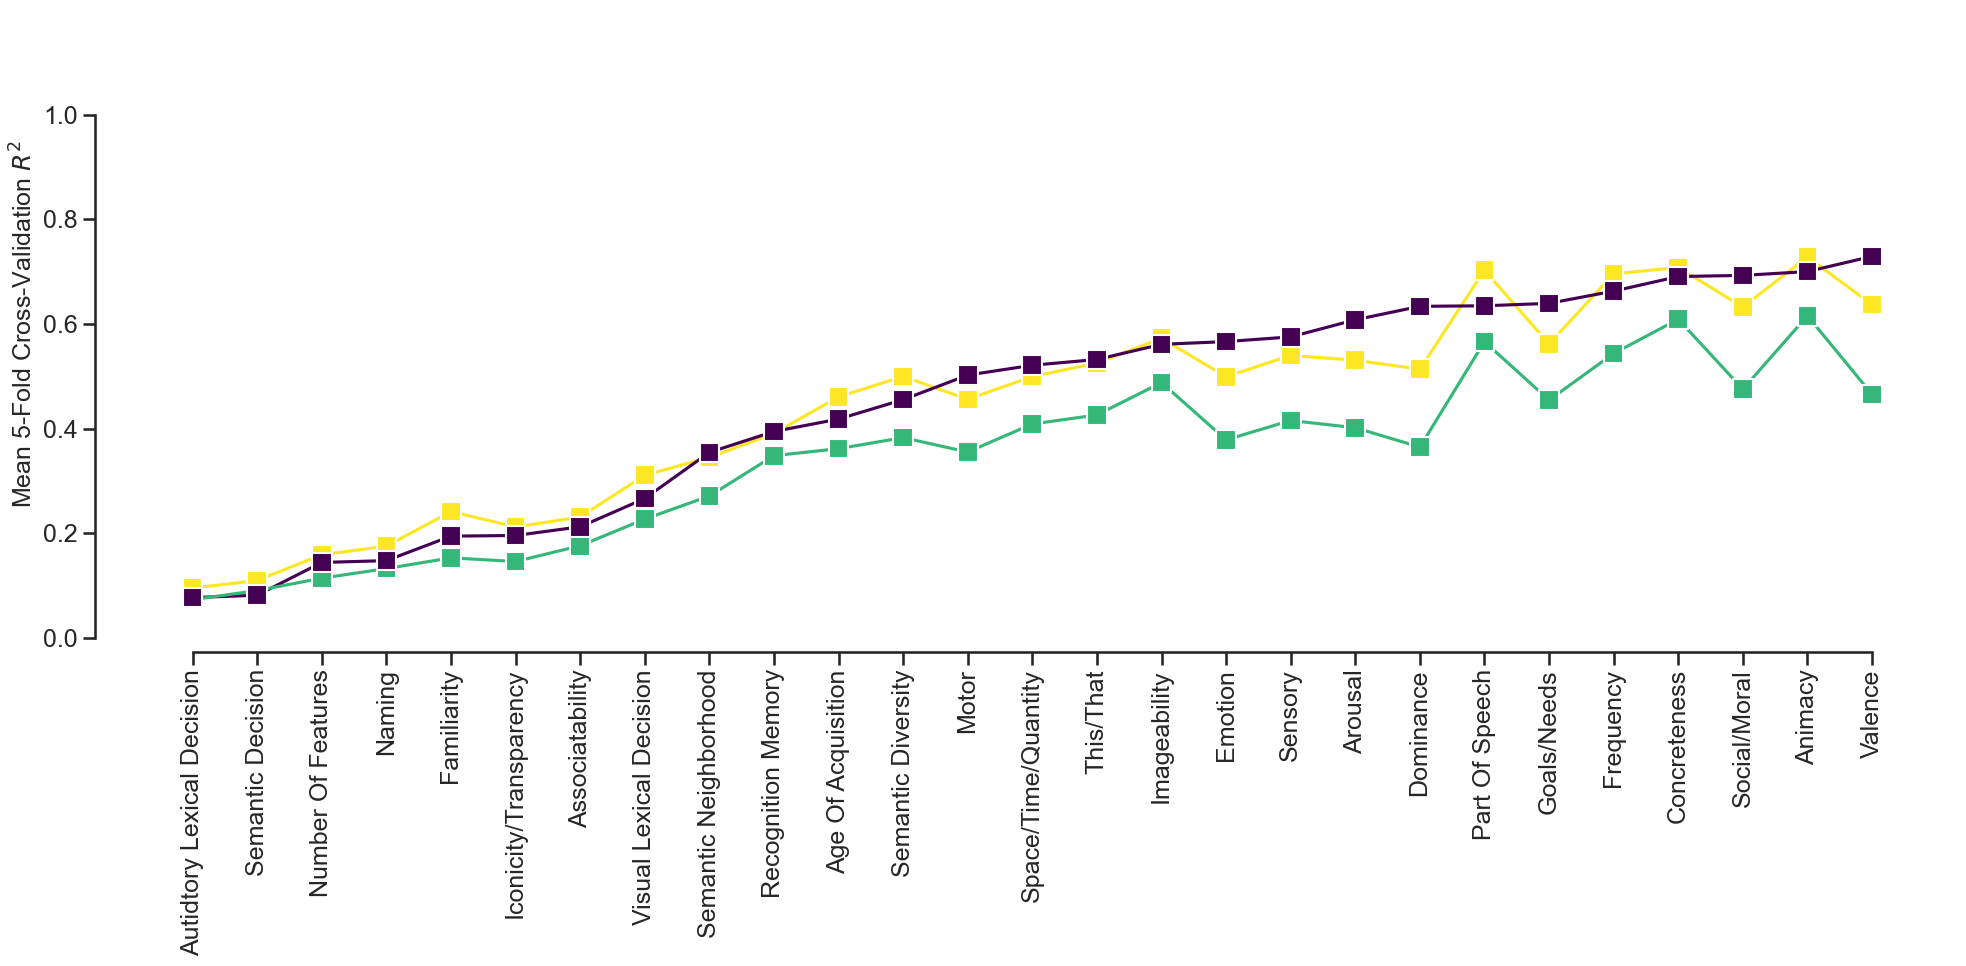

In [17]:
sns.set(context='talk', style='white')
fig, ax = plt.subplots(1, figsize=(20, 10))

sns.lineplot(
    rca_grand_mean,
    x='norm_category', y='r2_grand_mean', hue='embed',
    palette=embed_to_color, zorder=0, legend=False, 
    ax=ax
)

for i, embed in enumerate(['text', 'text&text', 'text&behavior']):
    sns.scatterplot(
        rca_grand_mean.query(f'embed == "{embed}"'), 
        marker='s', x='norm_category', y='r2_grand_mean', hue='embed',
        s=200, palette=embed_to_color, edgecolor='white', linewidth=1.5,
        zorder=i+1, legend=False,
        ax=ax
    )

    
# Formatting axes
y_min, y_max = 0, 1.2
ax.set(
    ylim=(y_min, y_max), xlabel='', ylabel='Mean 5-Fold Cross-Validation $R^2$',
    yticks=np.arange(y_min, y_max, .2)
)

ax.tick_params(axis='x', rotation=90, which='both', bottom=True, top=False, labelbottom=True, labelsize=18)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=18)


sns.despine(offset=10, trim=True)
fig.tight_layout()
# fig.savefig('../../figures/rca_ensemb.png', dpi=300, bbox_inches='tight')

## Paper Stats

In [ ]:
rca

In [ ]:
# Pivoting 
rca_piv = ( 
    rca[['embed', 'norm', 'norm_category', 'fold', 'r2']]
    .pivot(index=['norm', 'fold', 'norm_category'], columns='embed', values='r2')
    .reset_index()
)
rca_piv

In [ ]:
def diff_stats(norm_cat):
    norm_dat = rca_piv.query(f'norm_category == "{norm_cat}"')
    diffs = pd.concat([
        norm_dat['morphoNLM&PPMI_SVD_SWOW'] - norm_dat['CBOW_GoogleNews&morphoNLM'],
        norm_dat['CBOW_GoogleNews&PPMI_SVD_SWOW'] - norm_dat['CBOW_GoogleNews&morphoNLM'],
    ])
    t, p = ttest_1samp(diffs, 0)
    return {'cat': norm_cat, 'mean': diffs.mean().round(2), 't': round(t, 2), 'p': p}

# Text & Behavior > Text & Text
print(diff_stats('valence'))
print(diff_stats('dominance'))
print(diff_stats('arousal'))
print(diff_stats('emotion'))
print('------------------------')
print(diff_stats('goals/needs'))
print(diff_stats('motor'))
print('------------------------')
print(diff_stats('social/moral'))

# Text & Behavior < Text & Text
print('------------------------')
print(diff_stats('part of speech'))
print(diff_stats('semantic diversity'))
print(diff_stats('familiarity'))

In [ ]:
valence = rca_piv.query('norm_category == "valence"')
valence_diffs = pd.concat([
    valence['morphoNLM&PPMI_SVD_SWOW'] - valence['CBOW_GoogleNews&morphoNLM'],
    valence['CBOW_GoogleNews&PPMI_SVD_SWOW'] - valence['CBOW_GoogleNews&morphoNLM'],
])

# scipy t-test for valence
ttest_1samp(valence_diffs, 0)